In [1]:
# ############################################ Projeto Final (parte II) ########################################################
#                                                   Modelo CNN
# Bibliotecas importantes para o treinamento com CNN
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
from time import process_time
style.use('ggplot')

In [2]:
# Download do fashion mnist
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
# Arrays Numpy retornados:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# Armazenaremos o nome das classes em um vetor que utilizaremos posteriormente quando plotarmos as imagens em um gráfico. 
class_names = ['Top', 'Calca', 'Pulover', 'Vestido', 'Casaco', 
               'Sandalia', 'Camiseta', 'Sapatilha', 'Bolsa', 'Bota']

In [5]:
# Antes do treinamento é importante observar os dados em detalhes. Para isso, utilizou-se os comandos print, shape e len
print(train_images.shape)
# (60000, 28, 28)

print(len(train_images))
# 60000

print(train_labels)
# array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

print(test_images.shape)
# (10000, 28, 28)

print(len(test_images))
# 10000

print(test_images)
# array([9, 8, 0, ..., 3, 2, 5], dtype=uint8)


(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


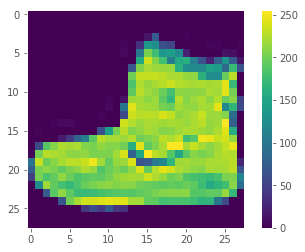

In [6]:
# Como os dados precisam ser preprocessados, isto é, preparados adequadamente antes de se treinar o modelo é importante 
# observar a primeira imagem do conjunto de treino: 
# Pixels variam de 0 a 255:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [7]:
#    Alterando pixel para 0 a 1

train_images = train_images / 255.0
test_images = test_images / 255.0

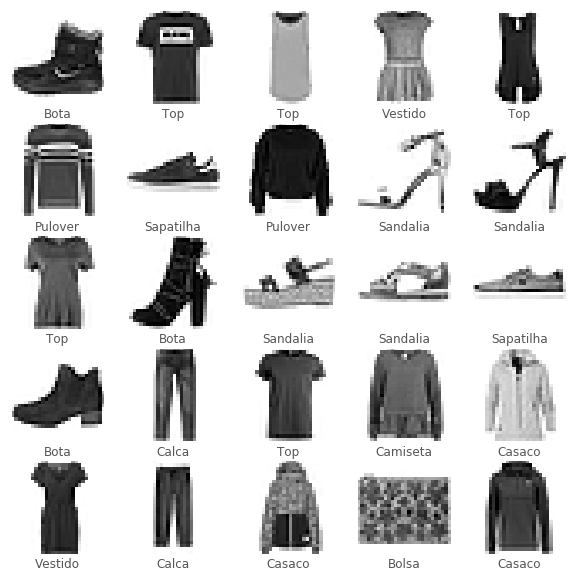

In [8]:
# imprimindo uma amostra do conjunto de dados após normalização

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [9]:
# 5. ----> Aplicar as técnicas: CNN

#   Para a CNN separar os dados de treinamento em conjuntos de treinamento / validação, colocando 5000 para validação 
# e mantenha 55.000 restantes para treinamento
(train_images, valid_images) = train_images[5000:], train_images[:5000] 
(train_labels, valid_labes) = train_labels[5000:], train_labels[:5000]

# Reshape dos dados de (28, 28) para (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
valid_images = valid_images.reshape(valid_images.shape[0], w, h, 1)
test_images  = test_images.reshape(test_images.shape[0], w, h, 1)

# Rótulos
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
valid_labes = tf.keras.utils.to_categorical(valid_labes, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Print do formato do conjunto de treinamento
print("train_images shape:", train_images.shape, "train_labels shape:", train_labels.shape)

# Print do número de conjuntos de dados de treinamento, validação e teste
print(train_images.shape[0], 'train set')
print(valid_images.shape[0], 'validation set')
print(test_images.shape[0], 'test set')

train_images shape: (55000, 28, 28, 1) train_labels shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [10]:
print('\Definindo arquitetura...')
model = tf.keras.Sequential()

# Definição de entrada na primeira camada da rede neural
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Resumo do modelo
model.summary()

\Definindo arquitetura...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_____________________________________________________________

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
print('\nIniciando treinamento...')
start = process_time()
clf = model.fit(train_images,
         train_labels,
         batch_size=64,
         epochs=1,
         validation_data=(valid_images, valid_labes))
end = process_time()
time_cnn = end - start
print('Tempo de treinamento_cnn: ' + str(time_cnn))


Iniciando treinamento...
Train on 55000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
55000/55000 [==============================] - 112s 2ms/sample - loss: 0.6118 - acc: 0.7741 - val_loss: 0.3749 - val_acc: 0.8668
Tempo de treinamento_cnn: 223.5625


In [13]:
# Evaluate the model on test set
score = model.evaluate(test_images, test_labels, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8623



Fazendo previsões sobre dados de validação...

 Previsão: [1.31923764e-04 1.09462484e-07 9.93349612e-01 5.91042481e-05
 1.16358872e-03 1.18818075e-08 5.29320491e-03 4.34551950e-09
 2.52462178e-06 9.89857885e-09]


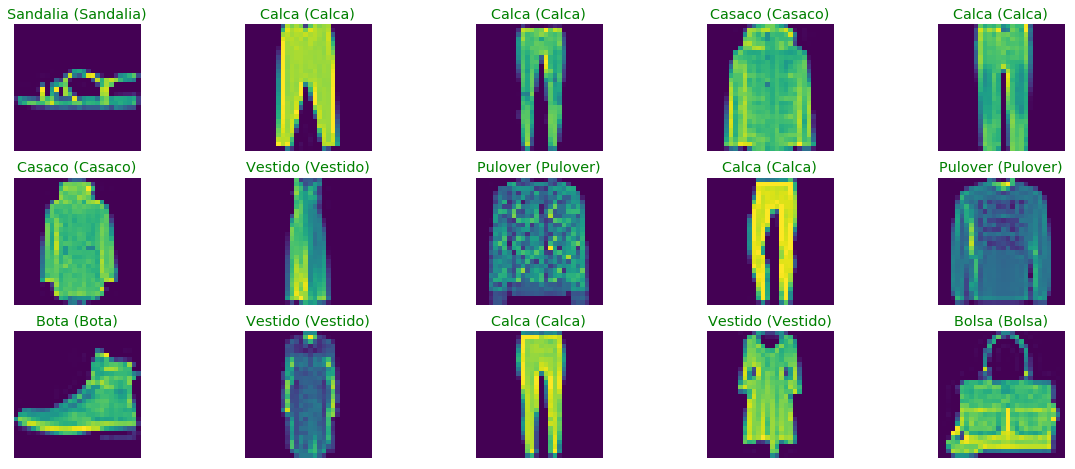

In [26]:
print('\nFazendo previsões sobre dados de validação...')
y_pred = model.predict(test_images)
print('\n', 'Previsão:', y_pred[1])

# Mostra aleatória de 10 imagens de testes, seus rótulos preditos em comparação com o original
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Exibir caada imagem
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_pred[index])
    true_index = np.argmax(test_labels[index])
    # Definir o título de cada imagem
    ax.set_title("{} ({})".format ( class_names[predict_index], 
                          class_names[true_index] ),
                          color=("green" if predict_index == true_index else "red"))